In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Jeu de données: Traffic métro

In [3]:
df = pd.read_csv(r'data\Metro_Interstate_Traffic_Volume.csv.gz', compression='gzip')
print(df.shape)
print(df["date_time"].min(), df["date_time"].max())
df.head(5)

(48204, 9)
2012-10-02 09:00:00 2018-09-30 23:00:00


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
round(df.isna().sum()/ len(df) *100 , 2)

holiday                99.87
temp                    0.00
rain_1h                 0.00
snow_1h                 0.00
clouds_all              0.00
weather_main            0.00
weather_description     0.00
date_time               0.00
traffic_volume          0.00
dtype: float64

In [5]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


### Valeurs manquantes dans les dates ! Non continues

In [4]:
df['date_time'] = pd.to_datetime(df['date_time'])
start, end = df['date_time'].min(), df['date_time'].max()
full_range = pd.date_range(start=start, end=end, freq='h')  # Fréquence de 1 heure

missing_timestamps = full_range.difference(df['date_time'])

# Afficher les résultats
print("Timestamps manquants :")
print(len(missing_timestamps) / len(full_range) * 100)

if len(missing_timestamps) > 0:
    gaps = (missing_timestamps[1:] - missing_timestamps[:-1]) != pd.Timedelta(hours=1)
    gap_indices = [0] + (gaps.nonzero()[0] + 1).tolist() + [len(missing_timestamps)]

    longest_gap = max(
        (missing_timestamps[gap_indices[i]:gap_indices[i+1]] for i in range(len(gap_indices)-1)),
        key=len
    )

    print("\nLa plus longue période de données manquantes est de", len(longest_gap), "heures :")
    print(longest_gap)
else:
    print("Aucune donnée manquante.")


# missing value per year
missing_by_year = pd.Series(missing_timestamps).dt.year.value_counts().sort_index()
print(missing_by_year)

Timestamps manquants :
22.78929040360792

La plus longue période de données manquantes est de 7386 heures :
DatetimeIndex(['2014-08-08 02:00:00', '2014-08-08 03:00:00',
               '2014-08-08 04:00:00', '2014-08-08 05:00:00',
               '2014-08-08 06:00:00', '2014-08-08 07:00:00',
               '2014-08-08 08:00:00', '2014-08-08 09:00:00',
               '2014-08-08 10:00:00', '2014-08-08 11:00:00',
               ...
               '2015-06-11 10:00:00', '2015-06-11 11:00:00',
               '2015-06-11 12:00:00', '2015-06-11 13:00:00',
               '2015-06-11 14:00:00', '2015-06-11 15:00:00',
               '2015-06-11 16:00:00', '2015-06-11 17:00:00',
               '2015-06-11 18:00:00', '2015-06-11 19:00:00'],
              dtype='datetime64[ns]', length=7386, freq=None)
2012      72
2013    1466
2014    4259
2015    5167
2016     946
2017      47
2018      19
Name: count, dtype: int64


## On garde que les 3,5 dernières années :()

In [5]:
df['date_time'] = pd.to_datetime(df['date_time'])
# cut at 06/2015
df = df[df["date_time"] >= "2015-06-01 10:00:00"]
print(len(df))
start, end = df['date_time'].min(), df['date_time'].max()
full_range = pd.date_range(start=start, end=end, freq='h')  # Fréquence de 1 heure

missing_timestamps = full_range.difference(df['date_time'])

# Afficher les résultats
print("Timestamps manquants :")
print(len(missing_timestamps) / len(full_range) * 100)

if len(missing_timestamps) > 0:
    gaps = (missing_timestamps[1:] - missing_timestamps[:-1]) != pd.Timedelta(hours=1)
    gap_indices = [0] + (gaps.nonzero()[0] + 1).tolist() + [len(missing_timestamps)]

    longest_gap = max(
        (missing_timestamps[gap_indices[i]:gap_indices[i+1]] for i in range(len(gap_indices)-1)),
        key=len
    )

    print("\nLa plus longue période de données manquantes est de", len(longest_gap), "heures :")
    print(longest_gap)
else:
    print("Aucune donnée manquante.")


# missing value per year
missing_by_year = pd.Series(missing_timestamps).dt.year.value_counts().sort_index()
print(missing_by_year)

32233
Timestamps manquants :
7.921441391688528

La plus longue période de données manquantes est de 117 heures :
DatetimeIndex(['2015-06-14 21:00:00', '2015-06-14 22:00:00',
               '2015-06-14 23:00:00', '2015-06-15 00:00:00',
               '2015-06-15 01:00:00', '2015-06-15 02:00:00',
               '2015-06-15 03:00:00', '2015-06-15 04:00:00',
               '2015-06-15 05:00:00', '2015-06-15 06:00:00',
               ...
               '2015-06-19 08:00:00', '2015-06-19 09:00:00',
               '2015-06-19 10:00:00', '2015-06-19 11:00:00',
               '2015-06-19 12:00:00', '2015-06-19 13:00:00',
               '2015-06-19 14:00:00', '2015-06-19 15:00:00',
               '2015-06-19 16:00:00', '2015-06-19 17:00:00'],
              dtype='datetime64[ns]', length=117, freq=None)
2015    1283
2016     946
2017      47
2018      19
Name: count, dtype: int64


On garde quand même plus de 30k pas de temps + 7% de valeurs manquantes qu'il faudra donc imputer

### Description des variables

In [6]:
df["holiday"].value_counts()

holiday
Labor Day                    6
Martin Luther King Jr Day    5
Independence Day             4
State Fair                   4
Christmas Day                4
New Years Day                4
Thanksgiving Day             4
Columbus Day                 3
Veterans Day                 3
Washingtons Birthday         3
Memorial Day                 3
Name: count, dtype: int64

In [7]:
df["weather_main"].value_counts(normalize=True)

weather_main
Clear           0.299569
Clouds          0.266621
Mist            0.130022
Rain            0.119536
Snow            0.059752
Drizzle         0.045109
Haze            0.030807
Thunderstorm    0.026246
Fog             0.021686
Smoke           0.000620
Squall          0.000031
Name: proportion, dtype: float64

In [8]:
df["weather_description"].value_counts(normalize=True)

weather_description
sky is clear                           0.270654
mist                                   0.130022
overcast clouds                        0.085440
broken clouds                          0.074520
scattered clouds                       0.074489
light rain                             0.065120
light snow                             0.051779
moderate rain                          0.038470
few clouds                             0.032172
haze                                   0.030807
Sky is Clear                           0.028914
light intensity drizzle                0.026557
fog                                    0.021686
proximity thunderstorm                 0.017622
drizzle                                0.016722
heavy intensity rain                   0.011169
snow                                   0.006143
proximity shower rain                  0.004126
thunderstorm                           0.003289
heavy intensity drizzle                0.001644
proximity thundersto

Text(0.5, 1.0, 'Traffic Volume Over Time')

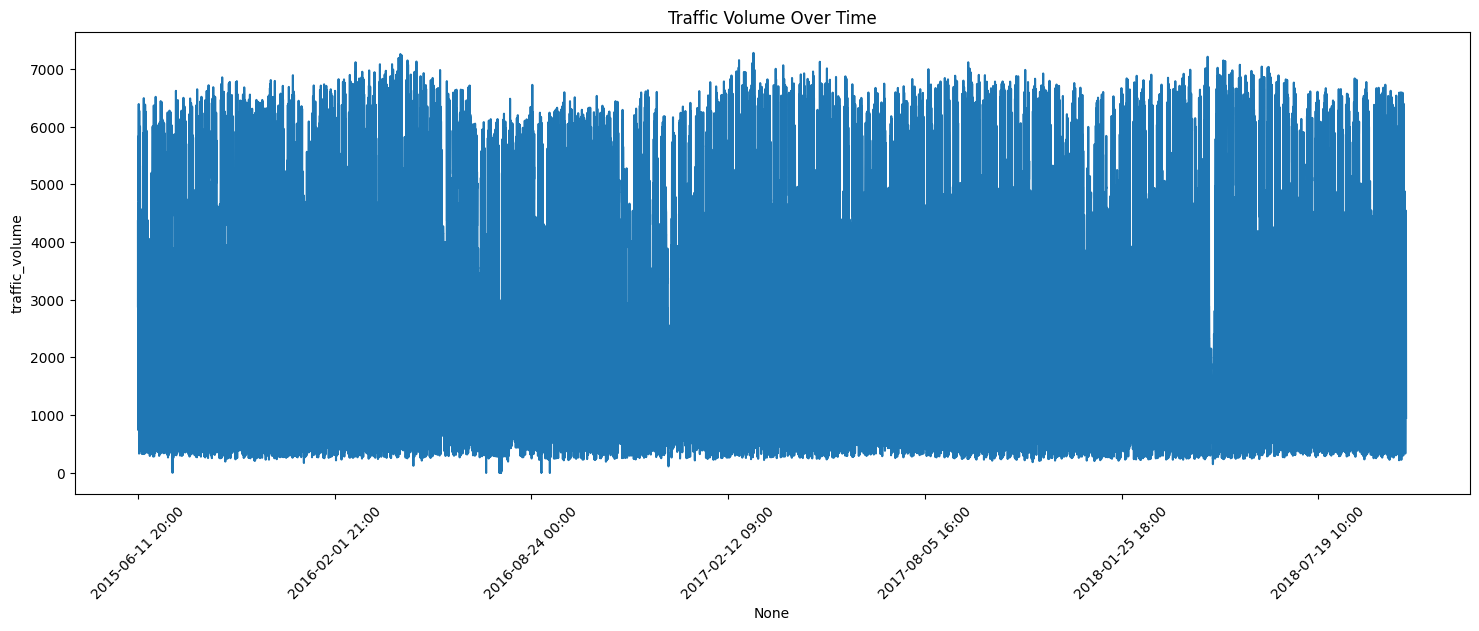

In [11]:
plt.figure(figsize=(18, 6))
sns.lineplot(x=df.index, y='traffic_volume', data=df)
plt.xticks(ticks=df['date_time'].index[::5000], labels=df['date_time'].dt.strftime('%Y-%m-%d %H:%M')[::5000], rotation=45)

plt.title('Traffic Volume Over Time')

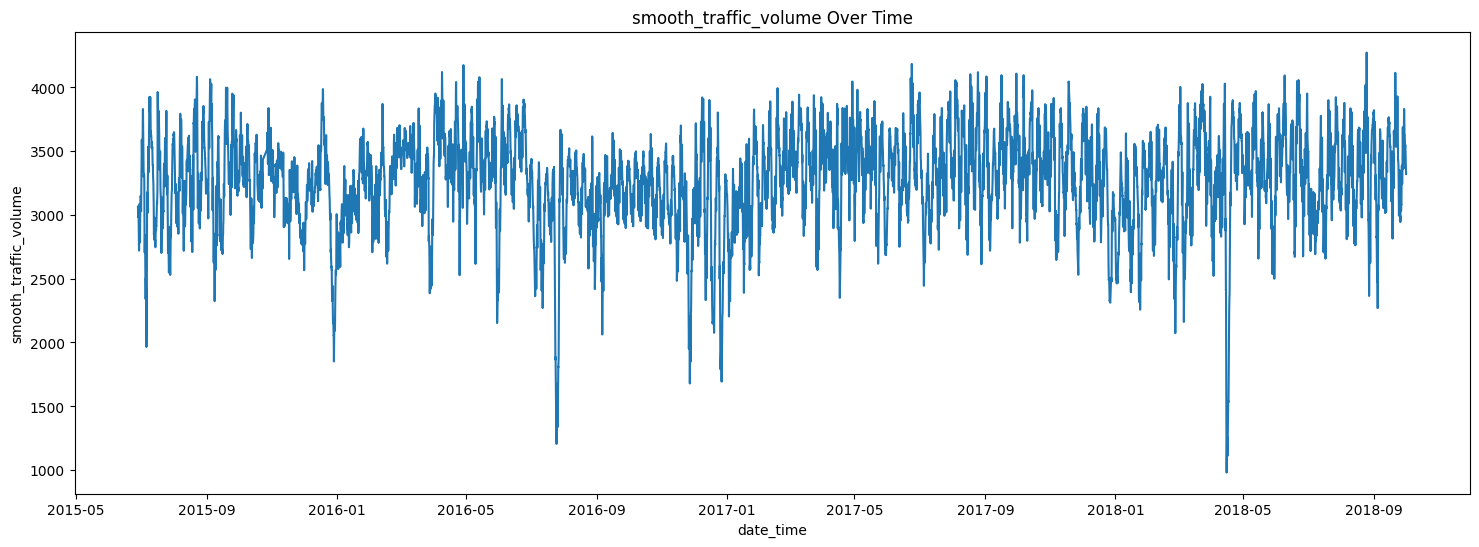

In [18]:
# smoothe data
plt.figure(figsize=(18, 6))
# Smooth the data using rolling mean
df['smooth_traffic_volume'] = df['traffic_volume'].rolling(window=100).mean()
sns.lineplot(x='date_time', y='smooth_traffic_volume', data=df,errorbar=None)

plt.title('smooth_traffic_volume Over Time')
plt.show()

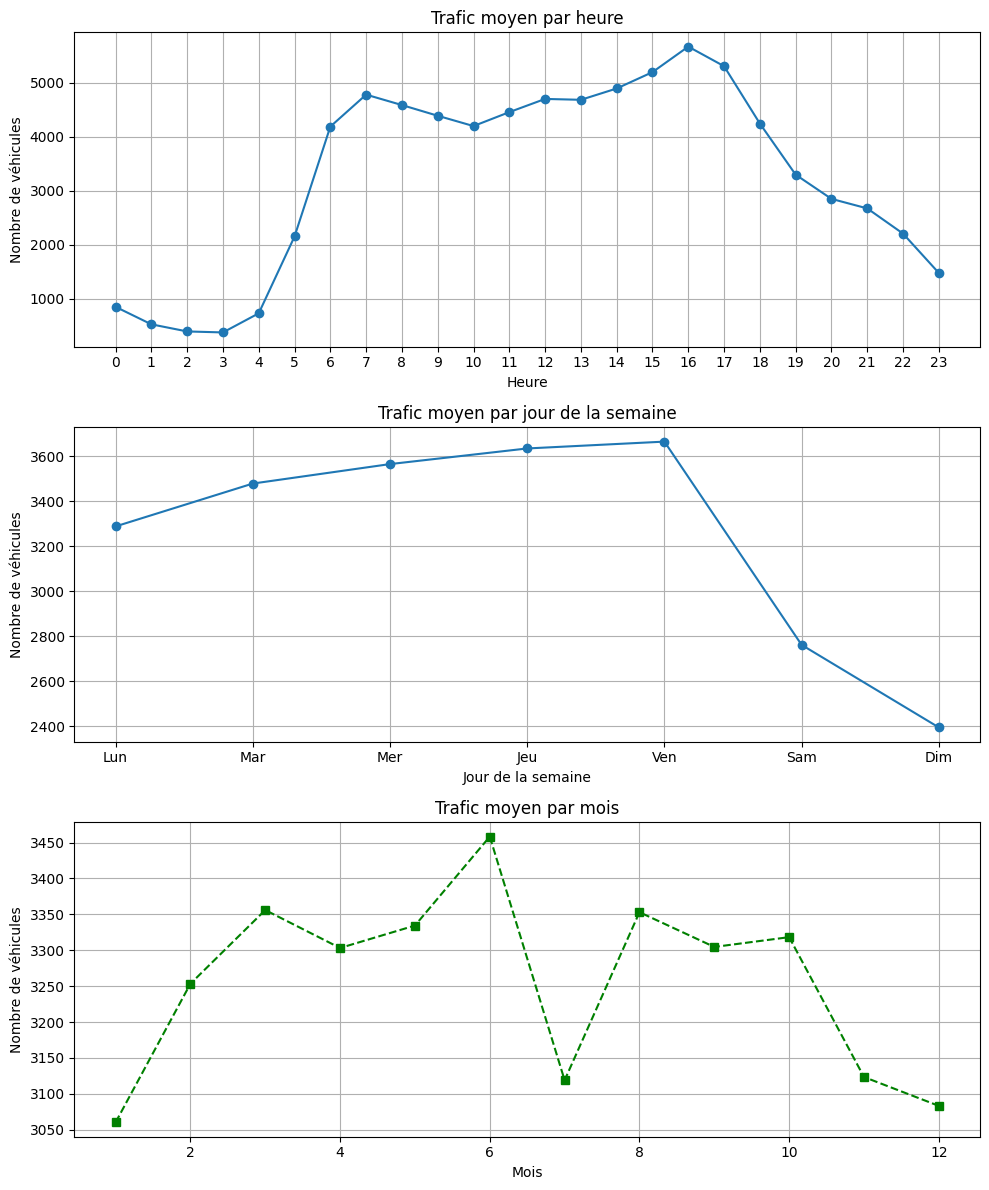

In [19]:
df["Hour"] = df["date_time"].dt.hour
df["Day"] = df["date_time"].dt.dayofweek 
df["Month"] = df["date_time"].dt.month

# Moyenne du trafic par heure
hourly_traffic = df.groupby("Hour")["traffic_volume"].mean()

# Moyenne du trafic par jour µde la semaine
daily_traffic = df.groupby("Day")["traffic_volume"].mean()

# Moyenne du trafic par mois
monthly_traffic = df.groupby("Month")["traffic_volume"].mean()

fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Trafic moyen par heure
axes[0].plot(hourly_traffic.index, hourly_traffic.values, marker='o')
axes[0].set_title("Trafic moyen par heure")
axes[0].set_xlabel("Heure")
axes[0].set_ylabel("Nombre de véhicules")
axes[0].grid(True)
axes[0].set_xticks(hourly_traffic.index)


# Trafic moyen par jour de la semaine
axes[1].plot(daily_traffic.index, daily_traffic.values, marker='o', linestyle='-')
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(["Lun", "Mar", "Mer", "Jeu", "Ven", "Sam", "Dim"])
axes[1].set_title("Trafic moyen par jour de la semaine")
axes[1].set_xlabel("Jour de la semaine")
axes[1].set_ylabel("Nombre de véhicules")
axes[1].grid(True)

# Trafic moyen par mois
axes[2].plot(monthly_traffic.index, monthly_traffic.values, marker='s', linestyle='--', color='g')
axes[2].set_title("Trafic moyen par mois")
axes[2].set_xlabel("Mois")
axes[2].set_ylabel("Nombre de véhicules")
axes[2].grid(True)

plt.tight_layout()
plt.show()

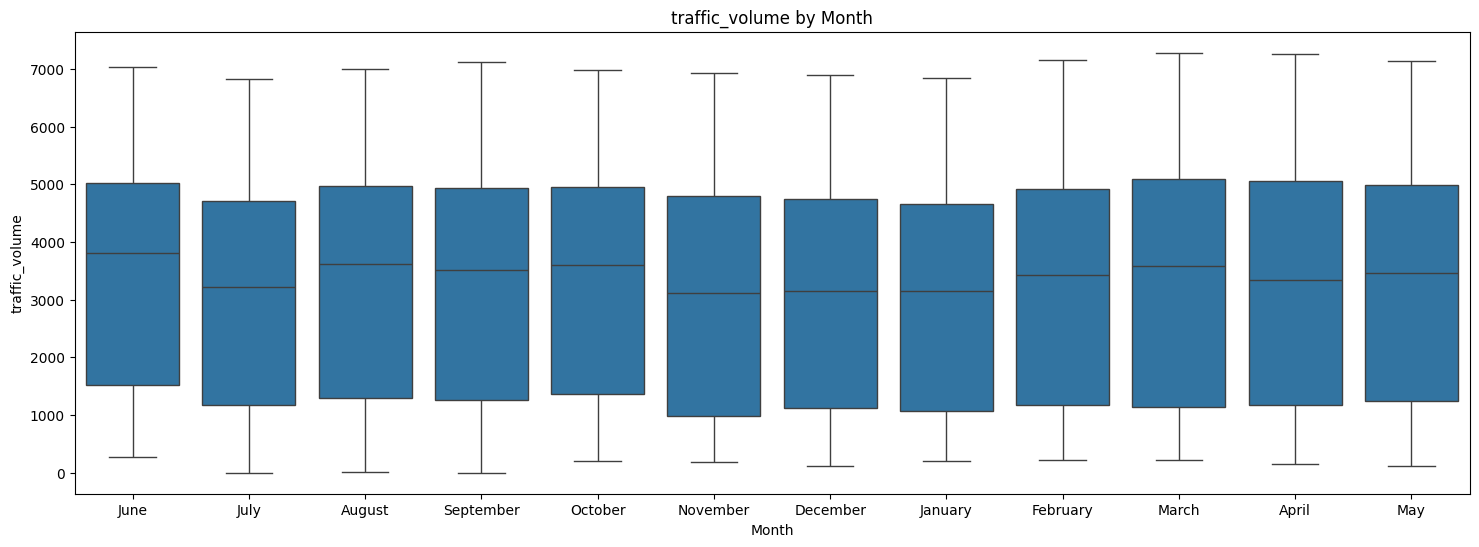

In [21]:
# box plot per month
df['Month'] = df['date_time'].dt.month_name()
plt.figure(figsize=(18, 6))
sns.boxplot(x='Month', y='traffic_volume', data=df)
plt.title('traffic_volume by Month')
plt.show()

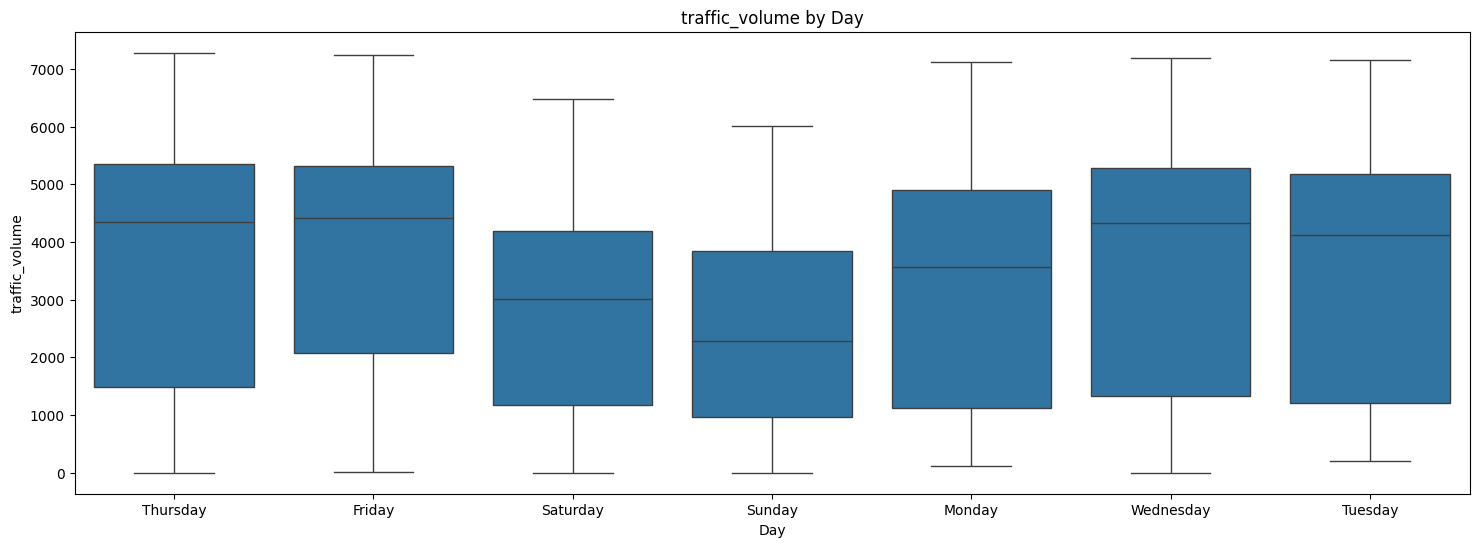

In [22]:
# box plot per day
df['Day'] = df['date_time'].dt.day_name()
plt.figure(figsize=(18, 6))
sns.boxplot(x='Day', y='traffic_volume', data=df)
plt.title('traffic_volume by Day')
plt.show()

C:\Users\emmae\AppData\Local\Temp\ipykernel_79176\2813390785.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weather_main', y='traffic_volume', data=df, palette='Set2')


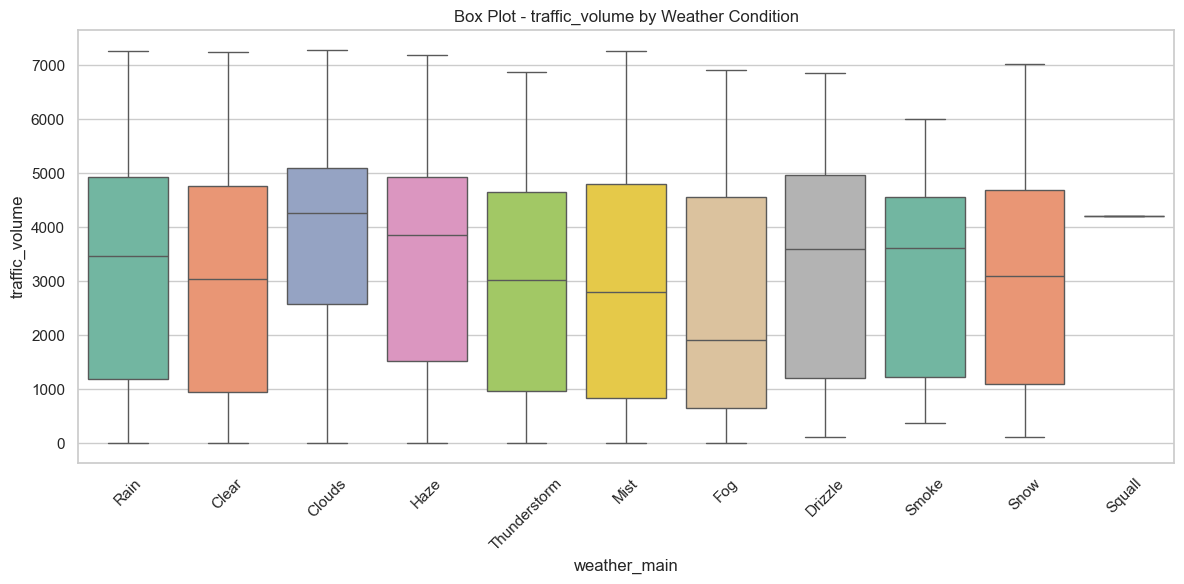

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x='weather_main', y='traffic_volume', data=df, palette='Set2')
plt.title('Box Plot - traffic_volume by Weather Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

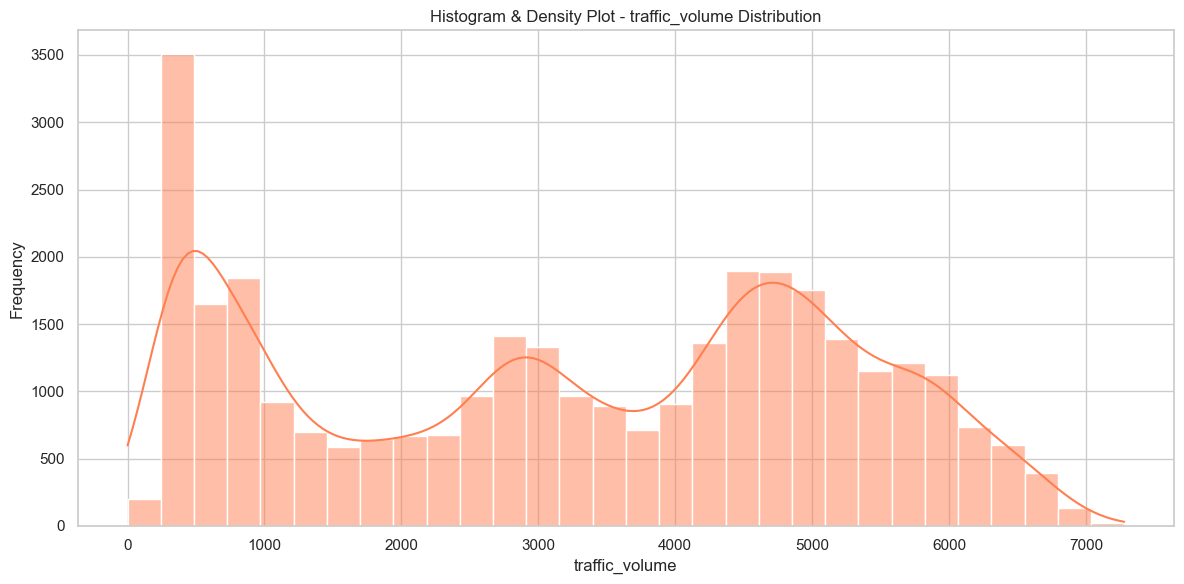

In [24]:
plt.figure(figsize=(12, 6))
sns.histplot(df['traffic_volume'], kde=True, color='coral', bins=30)
plt.title('Histogram & Density Plot - traffic_volume Distribution')
plt.xlabel('traffic_volume')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [26]:
# df['holiday'] = df['holiday'].astype(int)
# corr = df[['traffic_volume', 'holiday']].corr()

# plt.figure(figsize=(6, 4))
# sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('Heatmap - Correlation Matrix')
# plt.tight_layout()
# plt.show()

In [27]:
# weather_traffic = df.groupby("Weather")["Traffic Volume"].mean().sort_values()

# # Moyenne du trafic en fonction des événements
# event_traffic = df.groupby("Events")["Traffic Volume"].mean()

# fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# sns.barplot(x=weather_traffic.index, y=weather_traffic.values, ax=axes[0])
# axes[0].set_title("Impact des conditions météorologiques sur le trafic")
# axes[0].set_xlabel("Conditions météorologiques")
# axes[0].set_ylabel("Trafic moyen (véhicules/h)")

# sns.barplot(x=["Pas d'événement", "Événement"], y=event_traffic.values, ax=axes[1])
# axes[1].set_title("Impact des événements sur le trafic")
# axes[1].set_xlabel("Présence d'événement")
# axes[1].set_ylabel("Trafic moyen (véhicules/h)")

# plt.tight_layout()
# plt.show()

NameError: name 'decomp_daily' is not defined

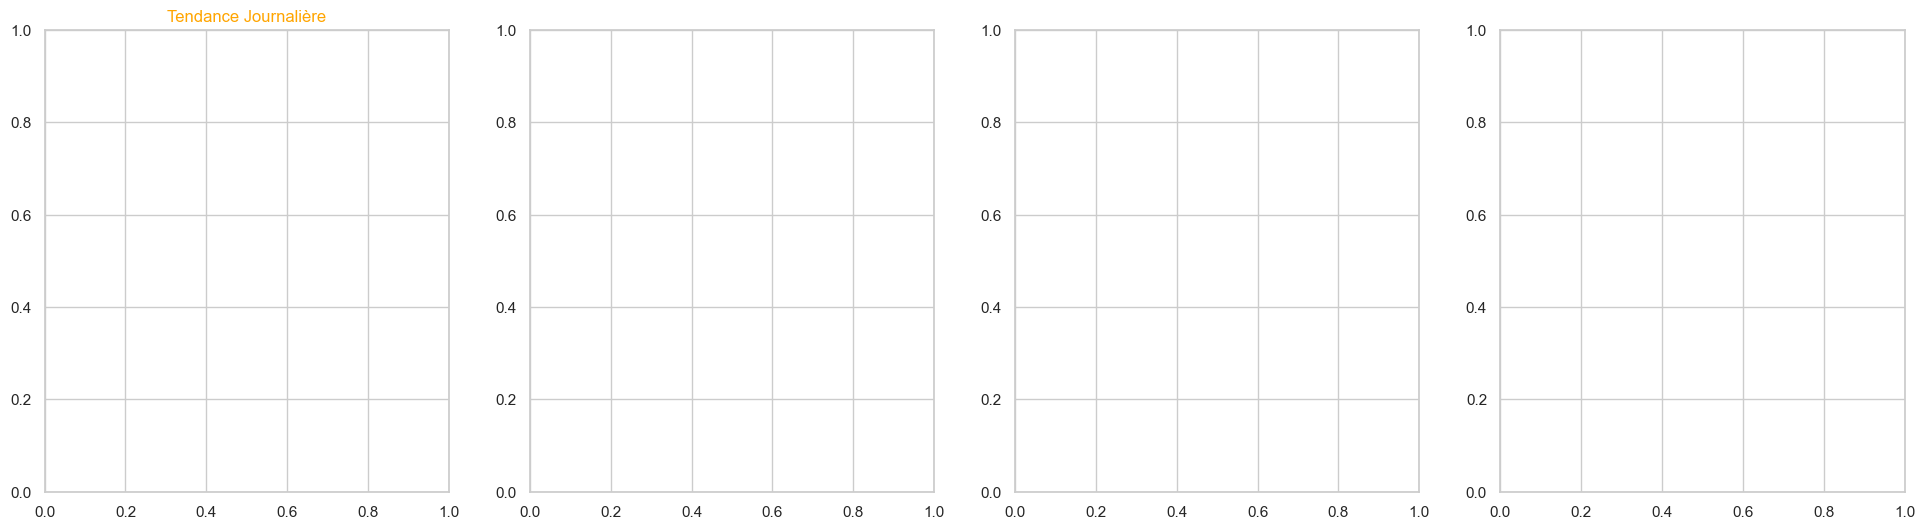

In [17]:
# 📌 Décomposition Temporelle avec Affichage Agrandi et Séparé

# Définition des couleurs pour chaque périodicité
colors = {
    "daily": "orange",
    "weekly": "blue",
    "monthly": "red",
    "biannual": "green"
}

# 🔹 Affichage séparé pour chaque métrique (Tendance, Saison, Résidus)

# 🎯 Tendance
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

axes[0].set_title("Tendance Journalière", color=colors["daily"])
decomp_daily.trend.plot(ax=axes[0], color=colors["daily"])

axes[1].set_title("Tendance Hebdomadaire", color=colors["weekly"])
decomp_weekly.trend.plot(ax=axes[1], color=colors["weekly"])

axes[2].set_title("Tendance Mensuelle", color=colors["monthly"])
decomp_monthly.trend.plot(ax=axes[2], color=colors["monthly"])

axes[3].set_title("Tendance Bi-annuelle (6 mois)", color=colors["biannual"])
decomp_biannual.trend.plot(ax=axes[3], color=colors["biannual"])

plt.tight_layout()
plt.show()

# 🎯 Saison
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

axes[0].set_title("Saisonnalité Journalière", color=colors["daily"])
decomp_daily.seasonal.plot(ax=axes[0], color=colors["daily"])

axes[1].set_title("Saisonnalité Hebdomadaire", color=colors["weekly"])
decomp_weekly.seasonal.plot(ax=axes[1], color=colors["weekly"])

axes[2].set_title("Saisonnalité Mensuelle", color=colors["monthly"])
decomp_monthly.seasonal.plot(ax=axes[2], color=colors["monthly"])

axes[3].set_title("Saisonnalité Bi-annuelle (6 mois)", color=colors["biannual"])
decomp_biannual.seasonal.plot(ax=axes[3], color=colors["biannual"])

plt.tight_layout()
plt.show()

# 🎯 Résidus
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

axes[0].set_title("Résidus Journaliers", color=colors["daily"])
decomp_daily.resid.plot(ax=axes[0], color=colors["daily"])

axes[1].set_title("Résidus Hebdomadaires", color=colors["weekly"])
decomp_weekly.resid.plot(ax=axes[1], color=colors["weekly"])

axes[2].set_title("Résidus Mensuels", color=colors["monthly"])
decomp_monthly.resid.plot(ax=axes[2], color=colors["monthly"])

axes[3].set_title("Résidus Bi-annuels (6 mois)", color=colors["biannual"])
decomp_biannual.resid.plot(ax=axes[3], color=colors["biannual"])

plt.tight_layout()
plt.show()


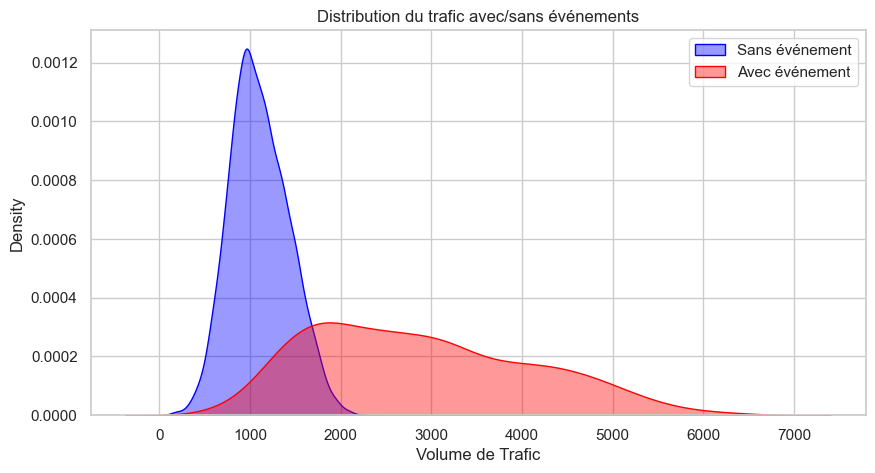

In [138]:
# 📌 **Exploration de l'Impact des Événements sur les Pics de Trafic**

df_event = df_decomp[df_decomp["Events"] == True]
df_no_event = df_decomp[df_decomp["Events"] == False]

# Comparaison des distributions de trafic
fig, ax = plt.subplots(figsize=(10, 5))
sns.kdeplot(df_no_event["Traffic Volume"], label="Sans événement", color="blue", fill=True, alpha=0.4)
sns.kdeplot(df_event["Traffic Volume"], label="Avec événement", color="red", fill=True, alpha=0.4)
ax.set_title("Distribution du trafic avec/sans événements")
ax.set_xlabel("Volume de Trafic")
ax.legend()
plt.show()


In [139]:

# 📌 **Comparaison des Jours Fériés vs Jours Ouvrés**
holidays = [
    "2023-01-01", "2023-04-10", "2023-05-01", "2023-05-08", "2023-07-14",
    "2023-08-15", "2023-11-01", "2023-11-11", "2023-12-25"
]
holidays = pd.to_datetime(holidays)

df_decomp["Is_Holiday"] = df_decomp.index.date.astype("datetime64").isin(holidays)

# # Calcul de la moyenne du trafic par type de jour
# traffic_holiday = df_decomp[df_decomp["Is_Holiday"]]["Traffic Volume"].mean()
# traffic_weekday = df_decomp[~df_decomp["Is_Holiday"]]["Traffic Volume"].mean()

# # Affichage des résultats
# fig, ax = plt.subplots(figsize=(8, 5))
# ax.bar(["Jours Ouvrés", "Jours Fériés"], [traffic_weekday, traffic_holiday], color=["blue", "red"], alpha=0.6)
# ax.set_title("Comparaison du trafic : Jours Ouvrés vs Jours Fériés")
# ax.set_ylabel("Trafic Moyen")
# plt.show()


AttributeError: 'Index' object has no attribute 'date'

### 📊 Analyse des Lag Scatter Plots

#### 🔹 Corrélation positive forte (Lags 1 à 4) :
- Les points forment un **alignement presque linéaire**, indiquant une forte **autocorrélation**.
- Cela signifie que le **volume de trafic actuel est fortement influencé par les volumes des heures précédentes**.
- Le trafic suit un **comportement assez prévisible à court terme**.

---

#### 🔸 Diminution progressive de la corrélation (à partir de Lag 5) :
- La **dispersion des points augmente légèrement**, bien que la corrélation reste visible.
---

#### 🔻 Patterns récurrents (Lags > 8) :
- Même avec des **retards plus longs**, on remarque des **structures cohérentes**, ce qui pourrait indiquer des **cycles journaliers ou hebdomadaires**.
---

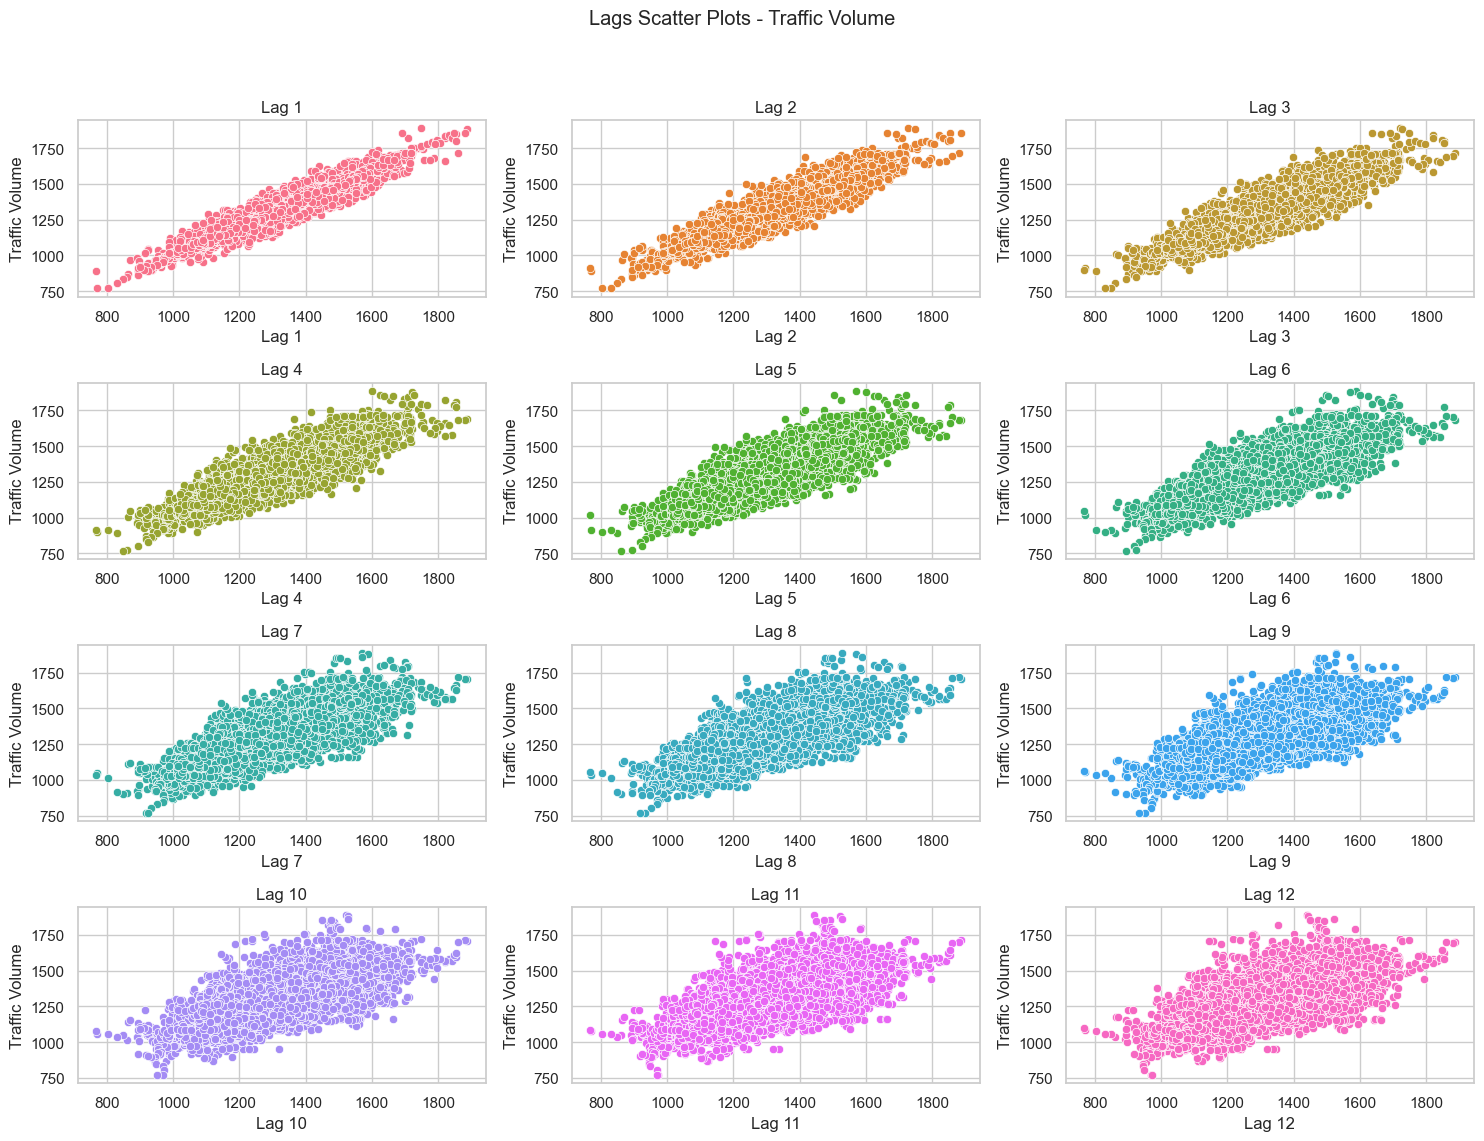

In [21]:
lags = 12
fig, axs = plt.subplots(4, 3, figsize=(15, 12))
fig.suptitle('Lags Scatter Plots - Traffic Volume')

for i in range(1, lags + 1):
    ax = axs[(i-1)//3, (i-1)%3]
    df[f'lag_{i}'] = df['Traffic Volume'].shift(i)
    sns.scatterplot(
        x=df[f'lag_{i}'], 
        y=df['Traffic Volume'], 
        ax=ax,
        color=sns.color_palette("husl", lags)[i-1]
    )
    ax.set_title(f'Lag {i}')
    ax.set_xlabel(f'Lag {i}')
    ax.set_ylabel('Traffic Volume')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()